# Temperature Forecast Project using ML
## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

## Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

## Dataset Link-
# •	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
df.shape

(7588, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [10]:
df.reset_index(inplace=True, drop=True) # resetting the index

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [12]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


columns :  LDAPS_WS,LDAPS_LH,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM have a big difference between 75% and max indicating presence of outliers.

In [13]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [14]:
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

### Target Variable are : Next_Tmax and Next_Tmin

<Axes: xlabel='Next_Tmax', ylabel='Density'>

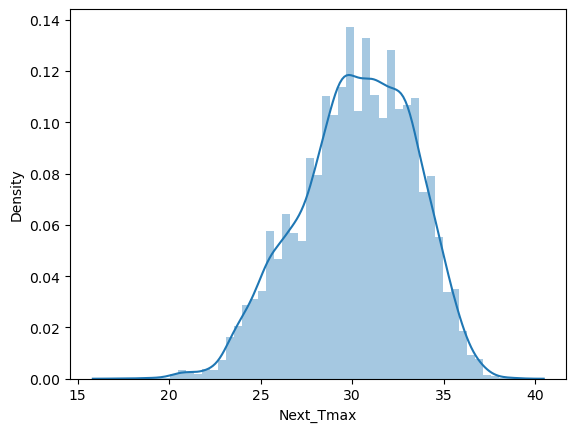

In [15]:
sns.distplot(df.Next_Tmax)

<Axes: xlabel='Next_Tmin', ylabel='Density'>

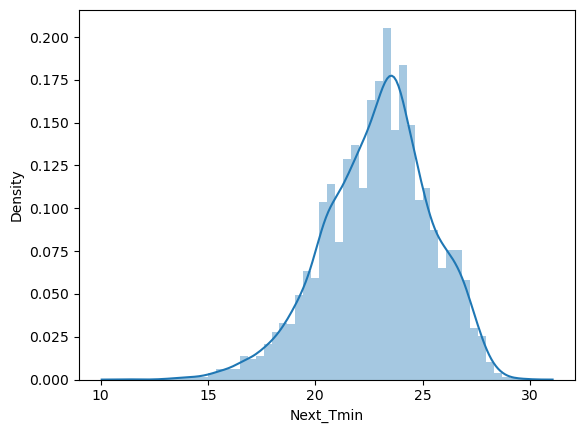

In [16]:
sns.distplot(df.Next_Tmin)

In [17]:
df.dtypes[df.dtypes == 'object']

Date    object
dtype: object

In [18]:
df.Date.unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '11-08-2013', '12-08-2013', '13-08-2013',
       '14-08-2013', '15-08-2013', '16-08-2013', '17-08-2013',
       '18-08-2013', '19-08-2013', '20-08-2013', '21-08-2013',
       '22-08-2013', '23-08-2013', '24-08-2013', '25-08-2013',
       '26-08-2013', '27-08-2013', '28-08-2013', '29-08-2013',
       '30-08-2013', '30-06-2014', '01-07-2014', '02-07

In [19]:
df.Date.value_counts()

30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

### Now we can separate day month and year from Date column.

In [20]:
df['Date']=pd.to_datetime(df['Date']) 

In [21]:
df['Day']=df['Date'].apply(lambda d:d.day) 

In [22]:
df['Month']=df['Date'].apply(lambda m:m.month)

In [23]:
df['Year']=df['Date'].apply(lambda y:y.year)

In [24]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [25]:
df.dtypes[df.dtypes != 'object']

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                          int64
Month                        int64
Year                         int64
dtype: object

In [26]:
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
Day                   21
Month                 12
Year                   5
dtype: int64

In [27]:
df.station.value_counts()

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [30]:
df.lat.value_counts()

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4562     307
37.4832     307
37.6450     306
Name: lat, dtype: int64

In [31]:
df.lon.value_counts()

126.970    307
126.955    307
126.891    307
127.024    307
127.099    307
127.032    307
127.058    306
127.022    306
127.083    305
126.995    304
127.004    304
127.040    304
126.927    303
126.991    303
126.826    302
126.988    302
126.937    302
126.938    302
127.086    302
126.909    302
127.085    301
126.838    301
127.042    301
126.910    300
127.135    296
Name: lon, dtype: int64

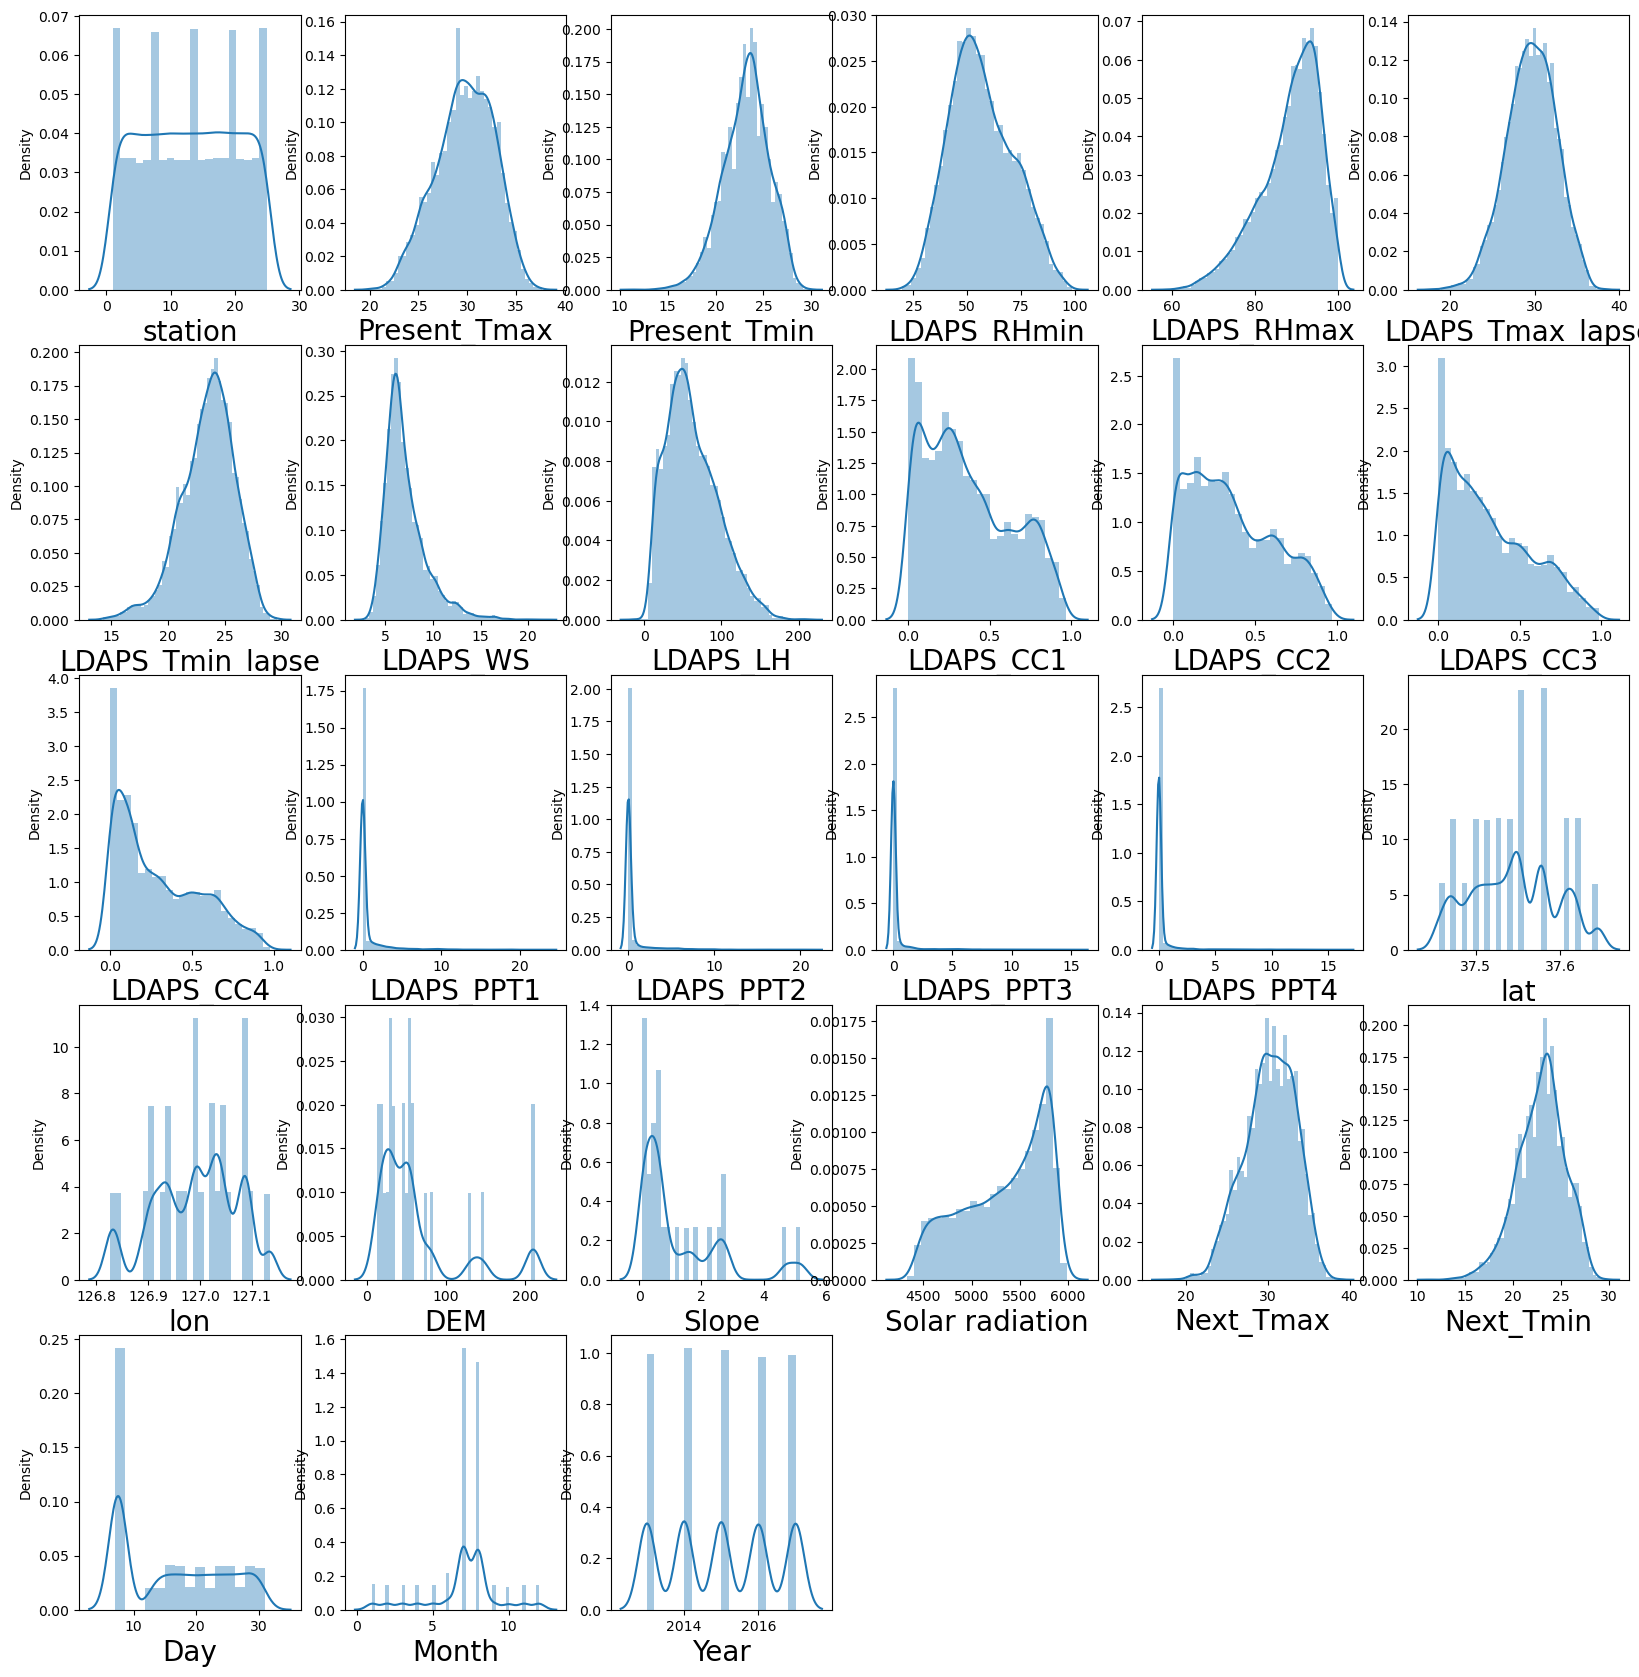

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for col in df.drop(columns=['Date']):
    if plotnumber<=30:
        plt.subplot(6,6,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
        
    plotnumber+=1
plt.show()

In [33]:
df.Date

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7583   2017-08-30
7584   2017-08-30
7585   2017-08-30
7586   2017-08-30
7587   2017-08-30
Name: Date, Length: 7588, dtype: datetime64[ns]

Text(0.5, 1.0, 'Min Temperature')

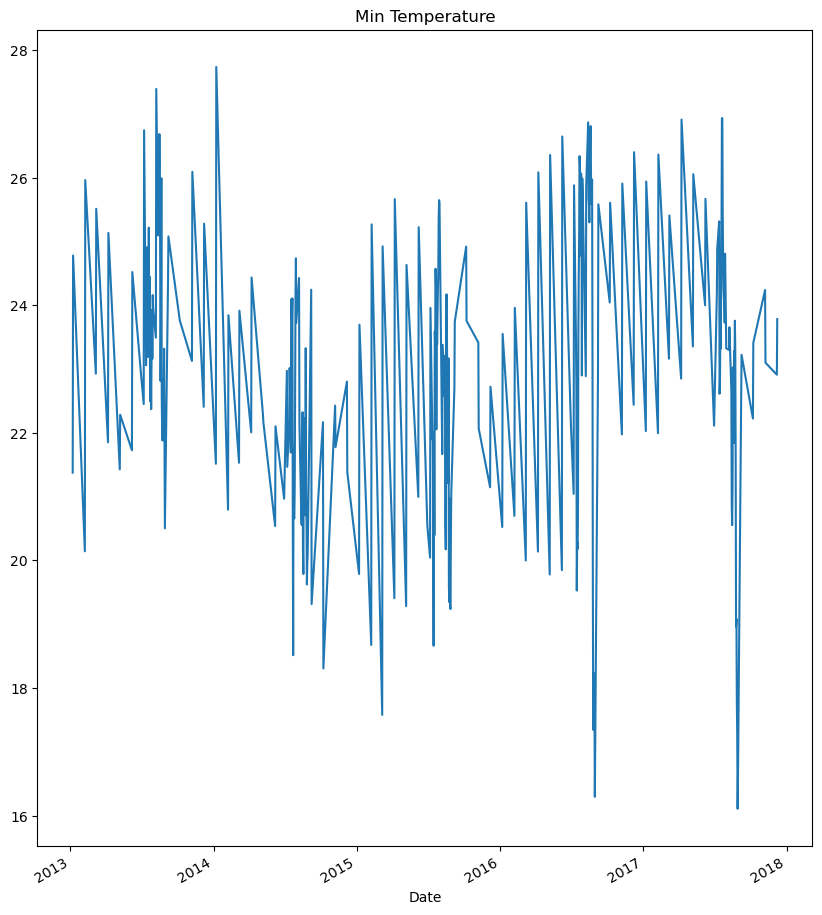

In [34]:
plt.figure(figsize=(10,12))
df.groupby('Date').mean()['Next_Tmin'].plot()
plt.title('Min Temperature')

Text(0.5, 1.0, 'Max Temperature')

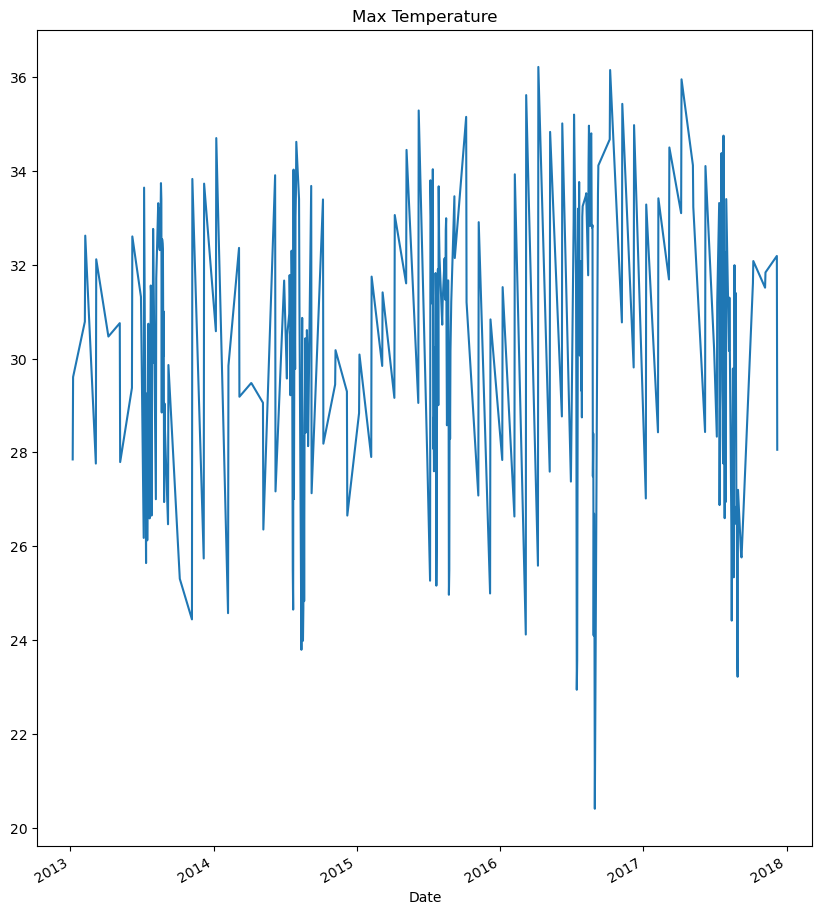

In [35]:
plt.figure(figsize=(10,12))
df.groupby('Date').mean()['Next_Tmax'].plot()
plt.title('Max Temperature')

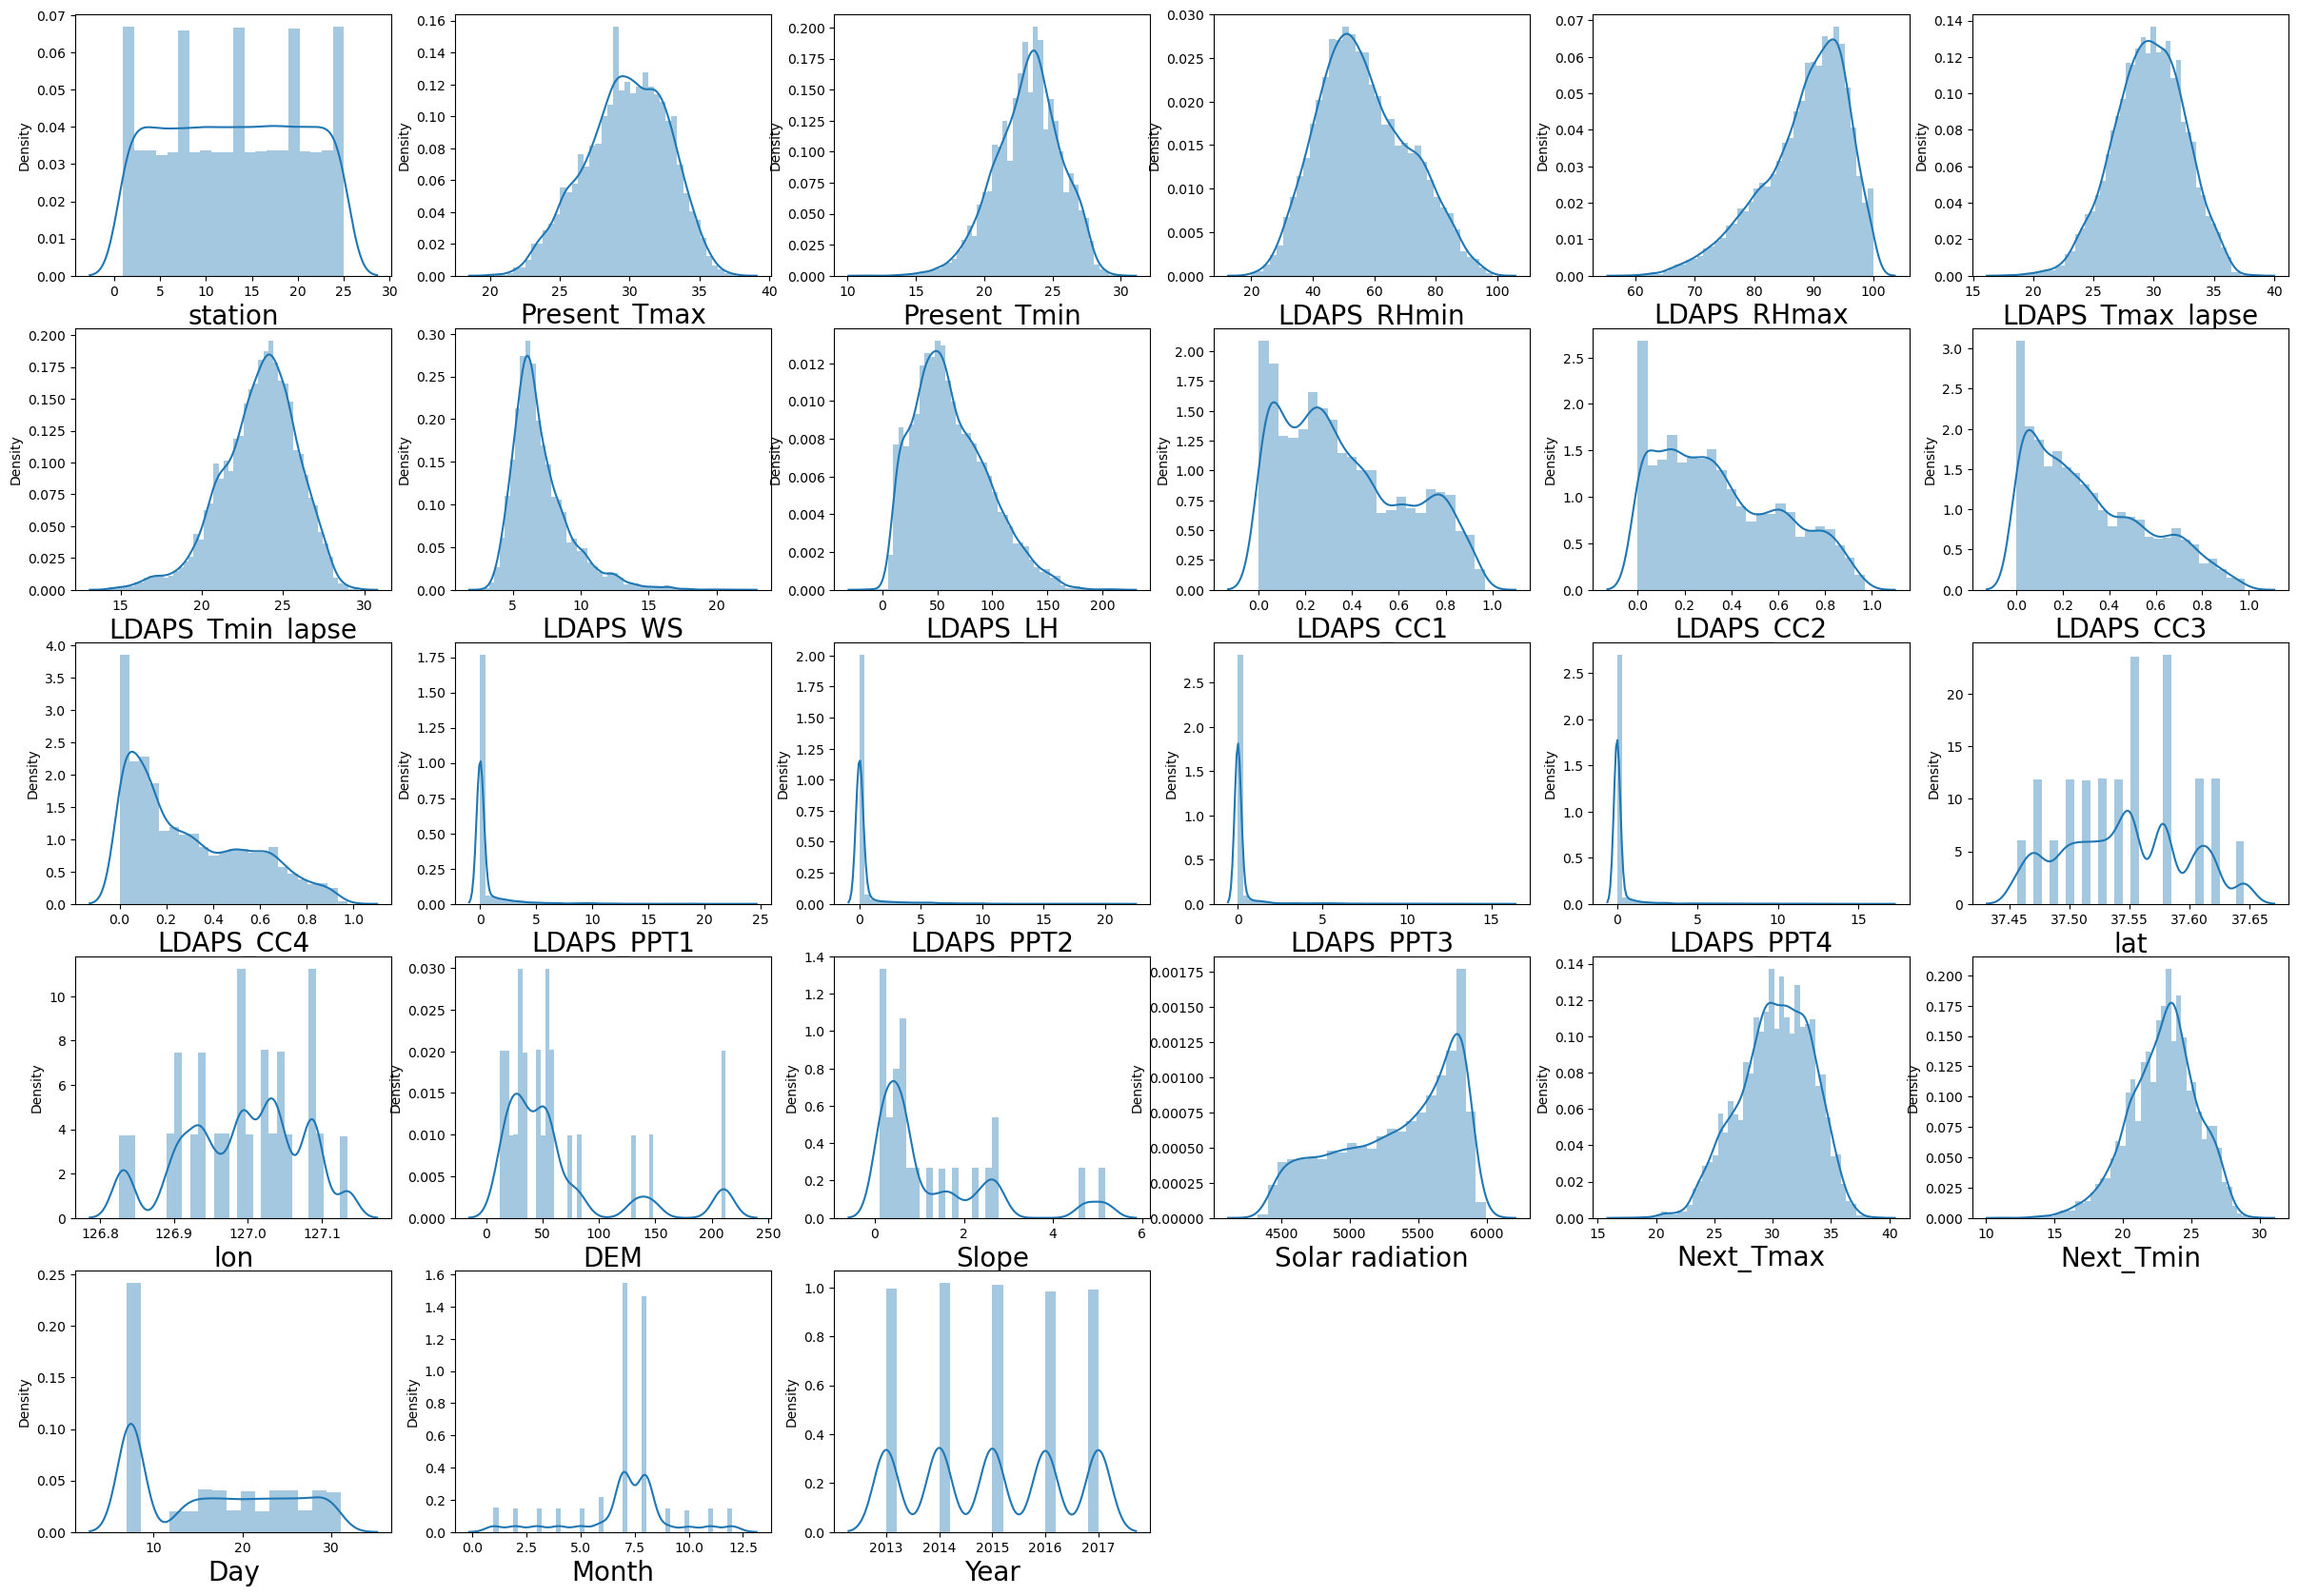

In [38]:
plt.figure(figsize=(30,25),facecolor='white')
plotnumber=1
for col in df.drop(columns=['Date']):
    if plotnumber<=30:
        plt.subplot(6,6,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

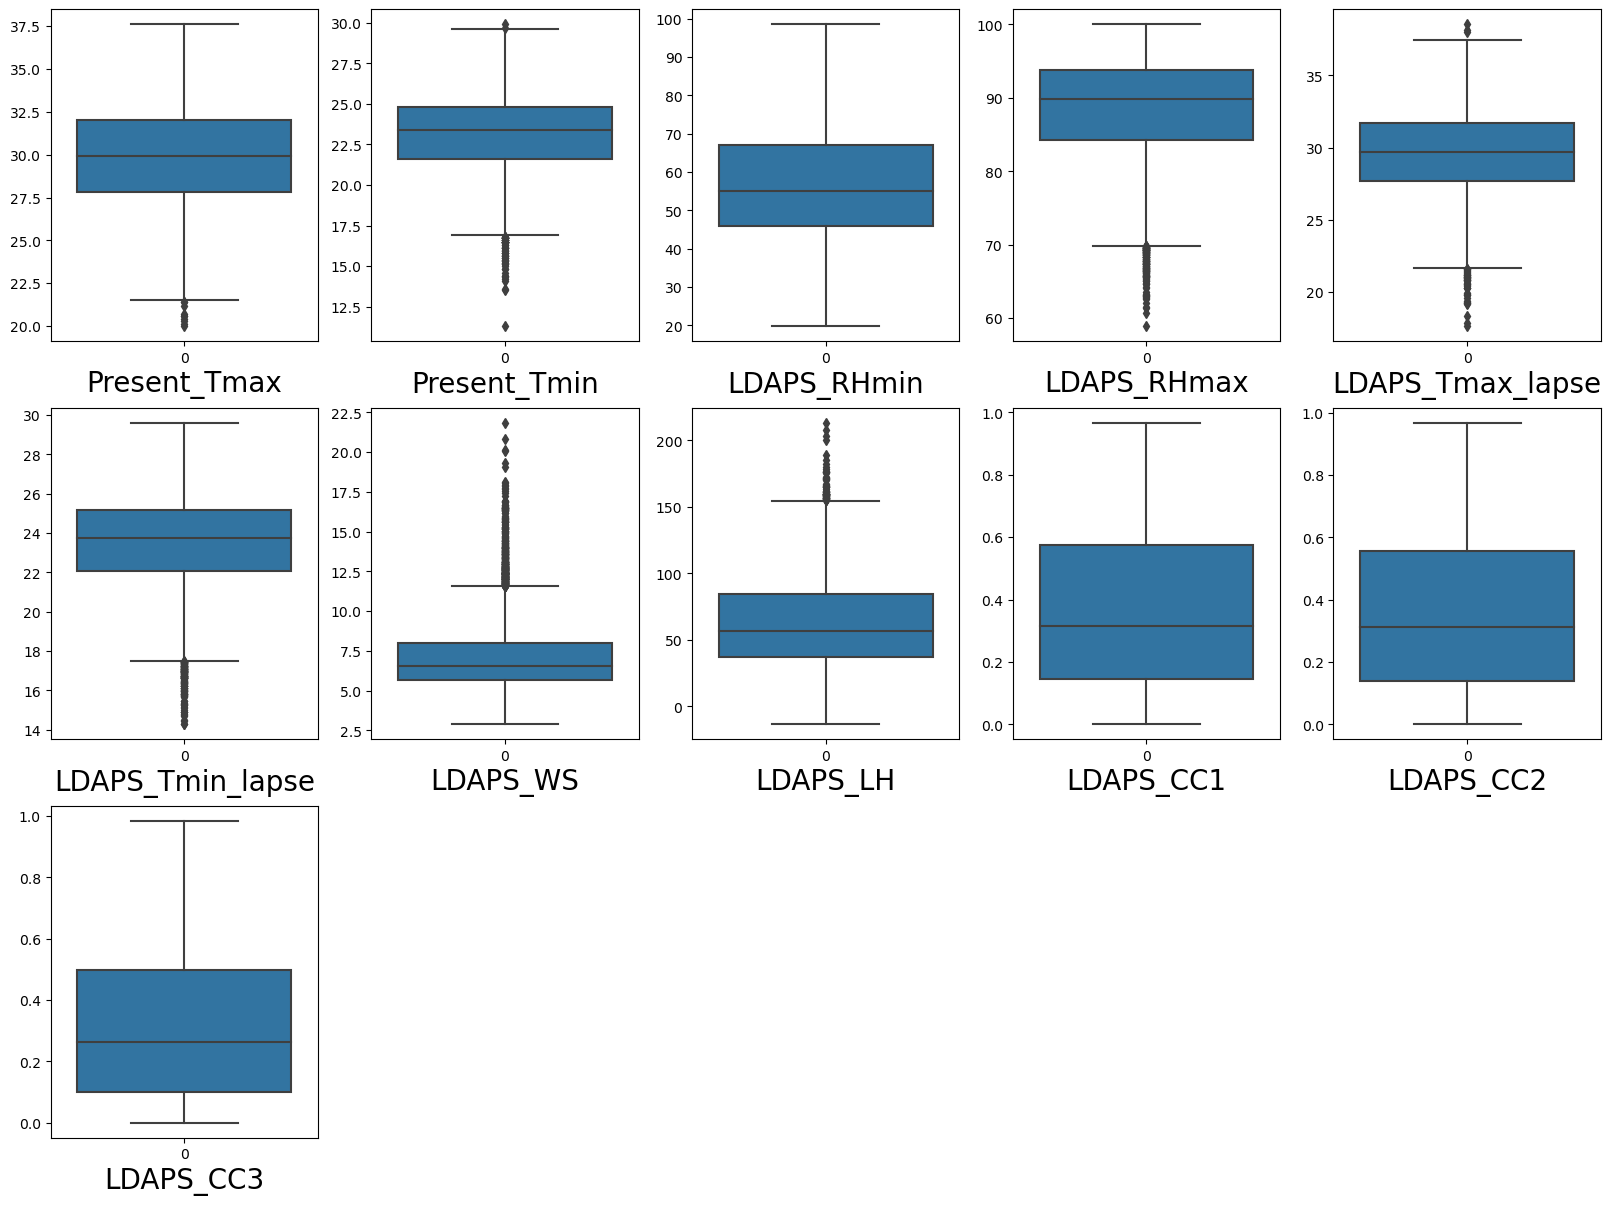

In [39]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df.drop(columns = ['Next_Tmin','Next_Tmax','Date','Year','Month','Day','Slope','DEM','lon','lat','Slope','station'],axis=1):
    if plotnumber<=11:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

## removing outliers

In [40]:
df2 =df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']].copy()

In [41]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] 

In [42]:
df3.shape

(7328, 7)

In [43]:
df2.shape

(7588, 7)

In [44]:
loss = (7588-7328)/7588 * 100
loss

3.4264628360569325

In [46]:
dropindex = df.index.difference(df3.index)

In [47]:
dropindex

Int64Index([  25,   33,   44,  175,  194,  268,  292,  341,  372,  391,
            ...
            7563, 7564, 7566, 7571, 7572, 7574, 7578, 7579, 7581, 7582],
           dtype='int64', length=260)

In [48]:
df.drop(dropindex,inplace = True)

In [50]:
df.shape

(7328, 28)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 0 to 7587
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7328 non-null   float64       
 1   Date              7328 non-null   datetime64[ns]
 2   Present_Tmax      7328 non-null   float64       
 3   Present_Tmin      7328 non-null   float64       
 4   LDAPS_RHmin       7328 non-null   float64       
 5   LDAPS_RHmax       7328 non-null   float64       
 6   LDAPS_Tmax_lapse  7328 non-null   float64       
 7   LDAPS_Tmin_lapse  7328 non-null   float64       
 8   LDAPS_WS          7328 non-null   float64       
 9   LDAPS_LH          7328 non-null   float64       
 10  LDAPS_CC1         7328 non-null   float64       
 11  LDAPS_CC2         7328 non-null   float64       
 12  LDAPS_CC3         7328 non-null   float64       
 13  LDAPS_CC4         7328 non-null   float64       
 14  LDAPS_PPT1        7328 n

In [52]:
df.reset_index(drop=True,inplace = True)

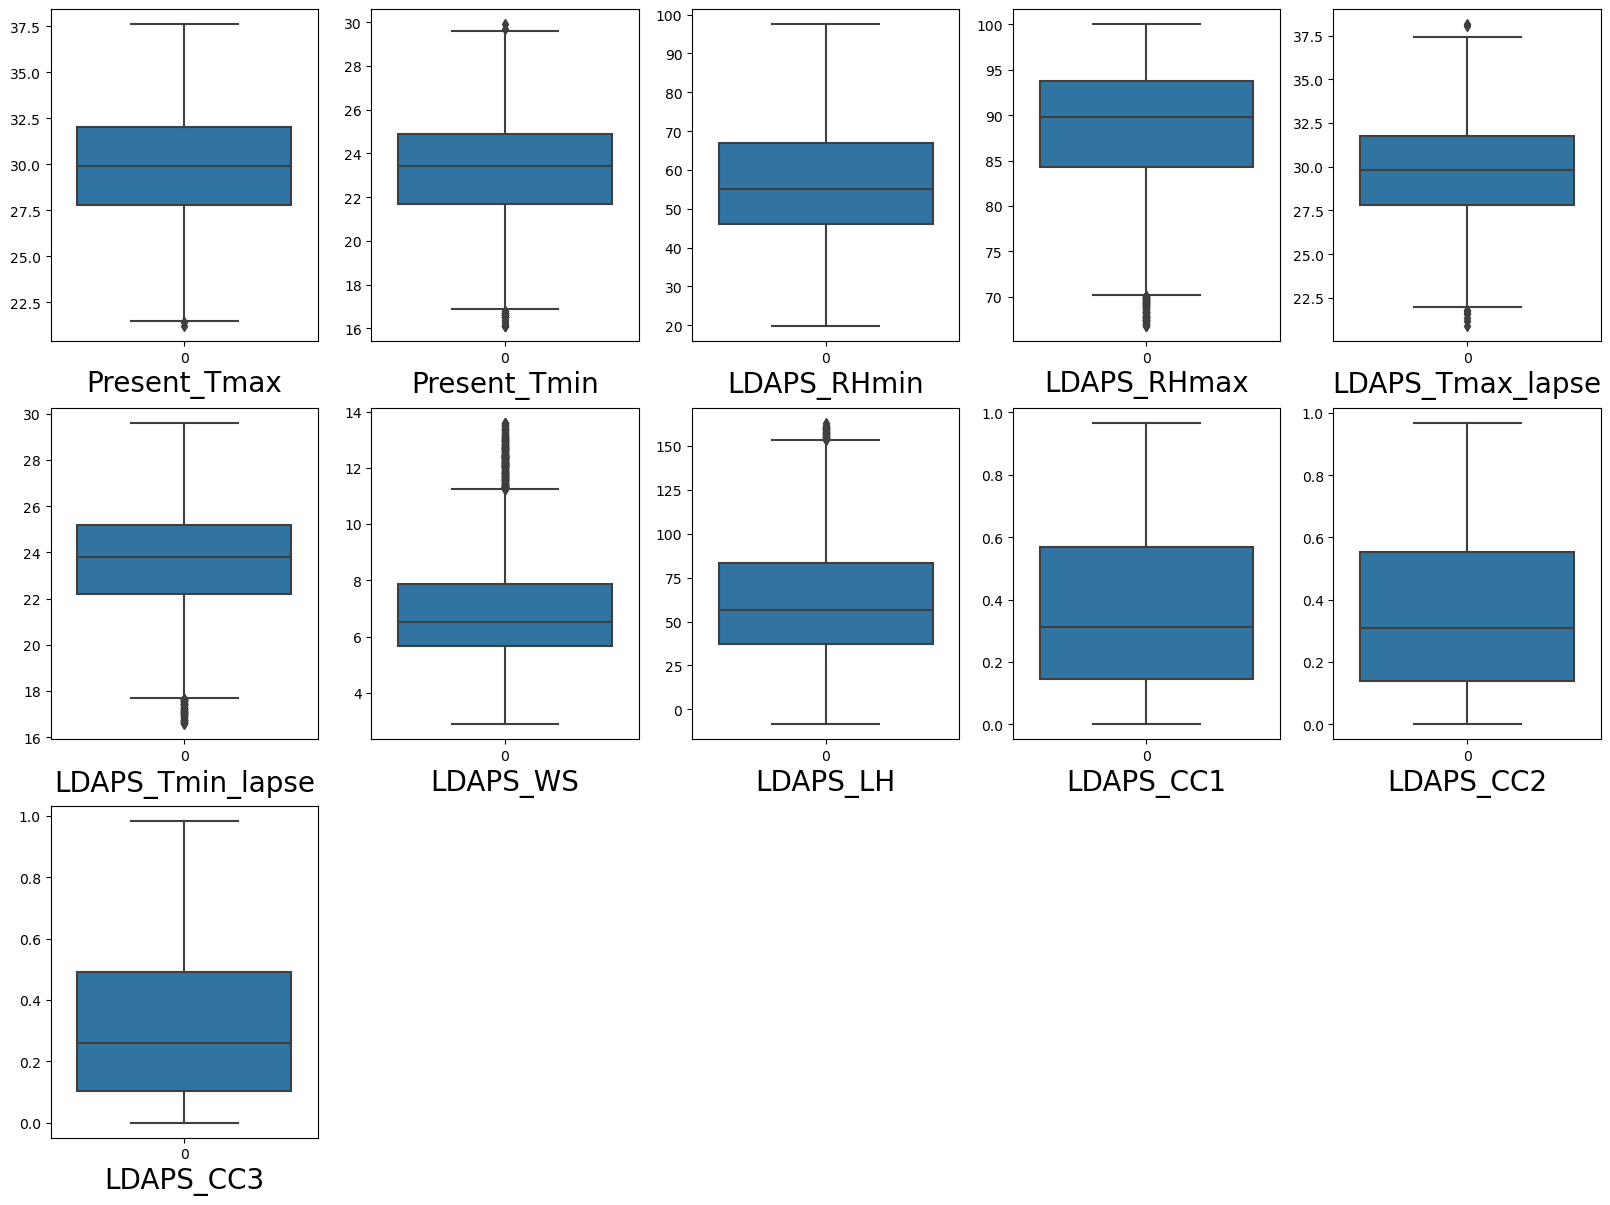

In [54]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df.drop(columns = ['Next_Tmin','Next_Tmax','Date','Year','Month','Day','Slope','DEM','lon','lat','Slope','station'],axis=1):
    if plotnumber<=11:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [55]:
df.skew()

station             0.000200
Present_Tmax       -0.221054
Present_Tmin       -0.211691
LDAPS_RHmin         0.282435
LDAPS_RHmax        -0.750789
LDAPS_Tmax_lapse   -0.096445
LDAPS_Tmin_lapse   -0.375972
LDAPS_WS            1.017383
LDAPS_LH            0.592215
LDAPS_CC1           0.479026
LDAPS_CC2           0.470458
LDAPS_CC3           0.637346
LDAPS_CC4           0.670804
LDAPS_PPT1          5.258862
LDAPS_PPT2          5.725304
LDAPS_PPT3          6.682187
LDAPS_PPT4          6.738968
lat                 0.103182
lon                -0.289917
DEM                 1.773696
Slope               1.597068
Solar radiation    -0.514832
Next_Tmax          -0.266139
Next_Tmin          -0.267519
Day                 0.261911
Month              -0.697207
Year                0.025009
dtype: float64

### LDAPS_RHmax,LDAPS_WS,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT4 are skewed.

## use power transformer

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)

In [58]:
df4 = df[['LDAPS_PPT3','LDAPS_RHmax','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4']]

In [59]:
transformed= pt.fit_transform(df4)

In [60]:
type(transformed)

numpy.ndarray

In [61]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [62]:
transformed.skew()

LDAPS_PPT3     1.834423
LDAPS_RHmax   -0.115415
LDAPS_WS       0.011083
LDAPS_CC3      0.089222
LDAPS_CC4      0.128838
LDAPS_PPT1     1.482251
LDAPS_PPT2     1.662433
LDAPS_PPT4     2.092009
dtype: float64

In [63]:
transformed.index = df.index

In [64]:
Skewed = ['LDAPS_PPT3','LDAPS_RHmax','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4']

In [65]:
df[Skewed] = transformed[Skewed]

In [66]:
df.skew()

station             0.000200
Present_Tmax       -0.221054
Present_Tmin       -0.211691
LDAPS_RHmin         0.282435
LDAPS_RHmax        -0.115415
LDAPS_Tmax_lapse   -0.096445
LDAPS_Tmin_lapse   -0.375972
LDAPS_WS            0.011083
LDAPS_LH            0.592215
LDAPS_CC1           0.479026
LDAPS_CC2           0.470458
LDAPS_CC3           0.089222
LDAPS_CC4           0.128838
LDAPS_PPT1          1.482251
LDAPS_PPT2          1.662433
LDAPS_PPT3          1.834423
LDAPS_PPT4          2.092009
lat                 0.103182
lon                -0.289917
DEM                 1.773696
Slope               1.597068
Solar radiation    -0.514832
Next_Tmax          -0.266139
Next_Tmin          -0.267519
Day                 0.261911
Month              -0.697207
Year                0.025009
dtype: float64

In [67]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,0.272318,28.074101,23.006936,0.122795,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,0.184362,29.850689,24.035009,-0.618784,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,-0.788607,30.091292,24.565633,-0.301361,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,1.322869,29.704629,23.326177,-0.650386,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,0.108705,29.113934,23.486480,-0.586569,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,21.0,2017-08-30,23.1,17.8,24.688997,-1.412508,27.812697,18.303014,-0.004593,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7324,22.0,2017-08-30,22.5,17.4,30.094858,-0.823871,26.704905,17.814038,-0.562089,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7325,23.0,2017-08-30,23.3,17.1,26.741310,-1.354203,26.352081,18.775678,-0.294170,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7326,24.0,2017-08-30,23.3,17.7,24.040634,-1.501444,27.010193,18.733519,-0.041401,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [68]:
df.Year.unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

## using Encoder to convert Year data

In [69]:
df['Year'] = df.Year.map({2013:1,2014:2,2015:3,2016:4,2017:5})

In [70]:
df.Year

0       1
1       1
2       1
3       1
4       1
       ..
7323    5
7324    5
7325    5
7326    5
7327    5
Name: Year, Length: 7328, dtype: int64

## Correlation

In [72]:
corr =df.corr()
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.108991,0.133577,-0.067520,-0.177713,0.064851,0.103057,0.024044,-0.126085,0.008070,...,-0.242788,-0.122140,-0.257161,-0.097119,-0.026889,0.104583,0.127296,0.001753,0.003435,0.004711
Present_Tmax,0.108991,1.000000,0.607157,-0.207608,-0.341784,0.559283,0.617874,-0.113647,0.139321,-0.318378,...,-0.046559,0.010962,-0.171887,-0.094716,-0.072286,0.602242,0.613929,-0.131591,0.012177,0.085854
Present_Tmin,0.133577,0.607157,1.000000,0.124639,-0.053487,0.432853,0.758022,0.020050,0.000019,0.098842,...,-0.073410,-0.041821,-0.247102,-0.143525,0.011211,0.428712,0.781831,-0.079025,-0.001927,0.071902
LDAPS_RHmin,-0.067520,-0.207608,0.124639,1.000000,0.589390,-0.587434,0.095979,0.219999,-0.068428,0.609110,...,0.079356,-0.081473,0.086582,0.108063,0.257718,-0.456700,0.100100,-0.067909,-0.065088,0.006140
LDAPS_RHmax,-0.177713,-0.341784,-0.053487,0.589390,1.000000,-0.424860,-0.168930,0.106262,0.233071,0.459017,...,0.227670,0.011550,0.186851,0.237557,0.179606,-0.341975,-0.117321,-0.014041,-0.055947,-0.147102
LDAPS_Tmax_lapse,0.064851,0.559283,0.432853,-0.587434,-0.424860,1.000000,0.622139,-0.203118,0.063004,-0.439024,...,-0.028850,0.098277,-0.159833,-0.145088,-0.001976,0.821287,0.556409,-0.124377,-0.003436,0.048300
LDAPS_Tmin_lapse,0.103057,0.617874,0.758022,0.095979,-0.168930,0.622139,1.000000,-0.038000,-0.129752,0.027001,...,-0.086537,-0.022948,-0.183717,-0.177226,0.102300,0.557163,0.877287,-0.134843,-0.011686,0.040621
LDAPS_WS,0.024044,-0.113647,0.020050,0.219999,0.106262,-0.203118,-0.038000,1.000000,-0.061823,0.239672,...,-0.020748,-0.074432,0.154950,0.121912,0.160822,-0.249204,-0.005407,-0.057923,-0.093522,-0.110312
LDAPS_LH,-0.126085,0.139321,0.000019,-0.068428,0.233071,0.063004,-0.129752,-0.061823,1.000000,-0.155005,...,0.122604,0.025988,0.061288,0.092165,-0.041993,0.181157,-0.045857,-0.020566,-0.025689,0.055784
LDAPS_CC1,0.008070,-0.318378,0.098842,0.609110,0.459017,-0.439024,0.027001,0.239672,-0.155005,1.000000,...,-0.014400,-0.009608,-0.029831,-0.036992,0.235503,-0.458797,0.001890,-0.028871,-0.086980,-0.067302


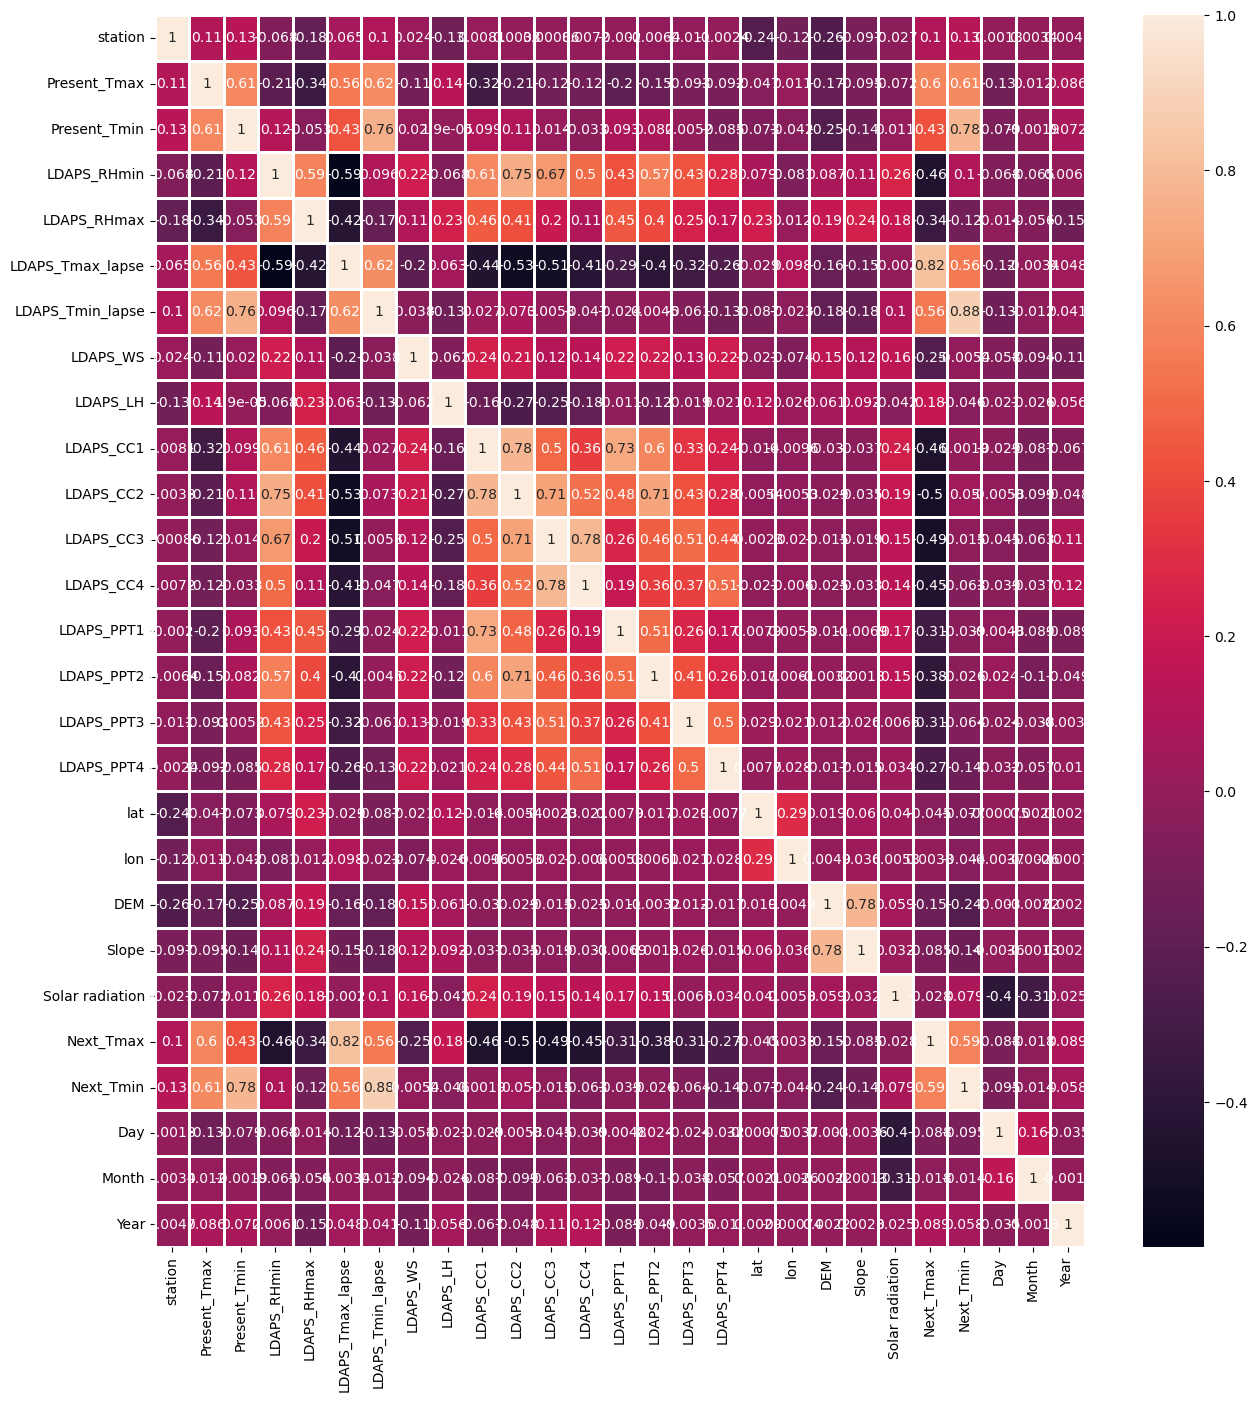

In [74]:
plt.figure(figsize=(15,16))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

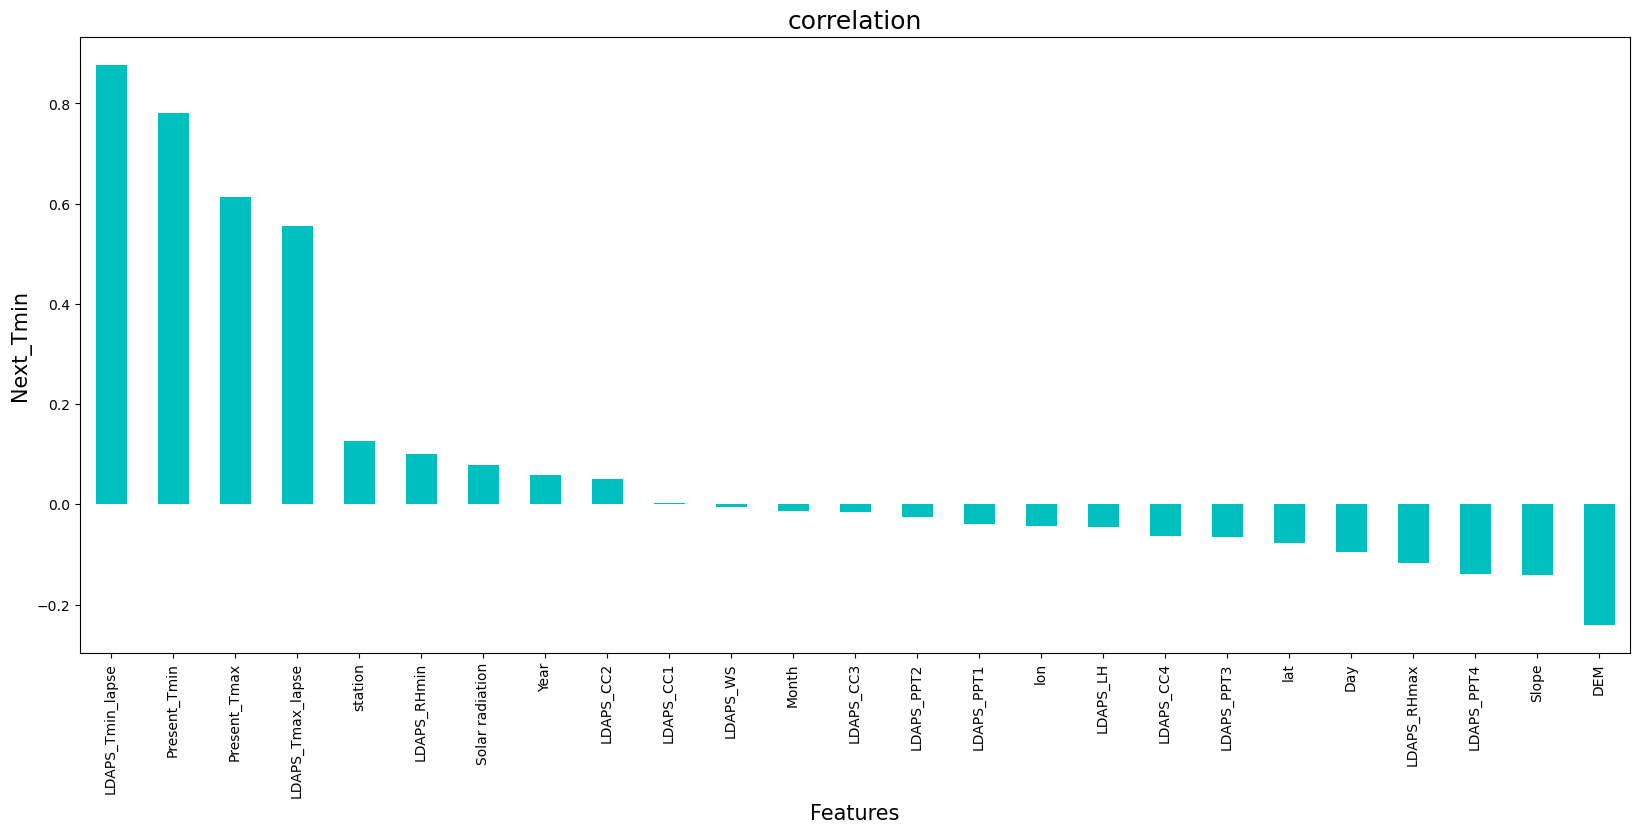

In [75]:
plt.figure(figsize = (20,8))
df.corr()['Next_Tmin'].sort_values(ascending = False).drop(['Next_Tmin','Next_Tmax']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Next_Tmin',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [76]:
df.drop(columns = ['Date','station'],inplace=True)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
x = df.drop(columns = ['Next_Tmax','Next_Tmin'])
y = df[['Next_Tmax','Next_Tmin']]

In [79]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

### Multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif = pd.DataFrame()

In [82]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [83]:
vif

,Features,vif
0,Present_Tmax,2.865212
1,Present_Tmin,3.085969
2,LDAPS_RHmin,6.645485
3,LDAPS_RHmax,2.657994
4,LDAPS_Tmax_lapse,7.294036
5,LDAPS_Tmin_lapse,7.180036
6,LDAPS_WS,1.240235
7,LDAPS_LH,1.513316
8,LDAPS_CC1,5.114038
9,LDAPS_CC2,6.178826


## Principle Component Analysis

In [84]:
from sklearn.decomposition import PCA

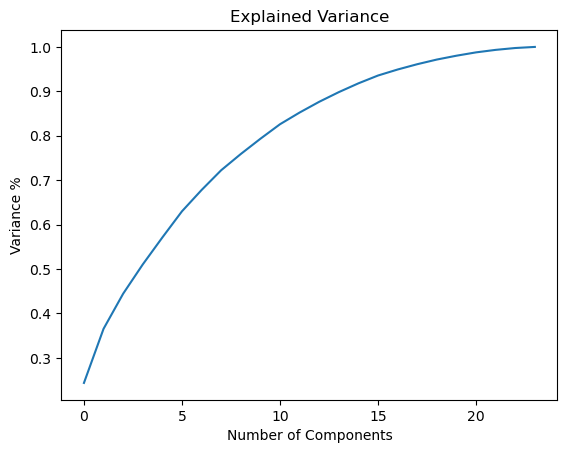

In [85]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

## selecting best features

In [86]:
from sklearn.feature_selection import SelectKBest, f_classif

In [87]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,df['Next_Tmax'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [89]:
fit = bestfeat.fit(x,df['Next_Tmax'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

dfcolumns.head()

featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

             Feature      Score
4   LDAPS_Tmax_lapse  94.033873
0       Present_Tmax  27.639412
5   LDAPS_Tmin_lapse  22.844582
9          LDAPS_CC2  16.682299
10         LDAPS_CC3  16.237546
8          LDAPS_CC1  13.989571
11         LDAPS_CC4  13.899222
2        LDAPS_RHmin  13.422343
1       Present_Tmin  12.451531
13        LDAPS_PPT2   9.857975
14        LDAPS_PPT3   8.881765
15        LDAPS_PPT4   7.585677
3        LDAPS_RHmax   6.954598
12        LDAPS_PPT1   6.517478
6           LDAPS_WS   4.375529
23              Year   2.650072
7           LDAPS_LH   2.437377
18               DEM   2.416500
21               Day   2.278197
22             Month   1.385071
19             Slope   1.299762
20   Solar radiation   1.133445
16               lat   0.975414
17               lon   0.883146


In [90]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,df['Next_Tmin'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [91]:
fit = bestfeat.fit(x,df['Next_Tmin'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

             Feature       Score
5   LDAPS_Tmin_lapse  172.830151
1       Present_Tmin   81.885834
0       Present_Tmax   33.273635
4   LDAPS_Tmax_lapse   24.406542
20   Solar radiation    4.123859
18               DEM    4.065352
2        LDAPS_RHmin    3.200922
3        LDAPS_RHmax    2.957244
15        LDAPS_PPT4    2.789107
11         LDAPS_CC4    2.288284
10         LDAPS_CC3    2.273752
21               Day    2.148870
9          LDAPS_CC2    1.998611
22             Month    1.835819
19             Slope    1.805455
8          LDAPS_CC1    1.788572
23              Year    1.707931
13        LDAPS_PPT2    1.565261
12        LDAPS_PPT1    1.549454
14        LDAPS_PPT3    1.487521
16               lat    1.445715
7           LDAPS_LH    1.348664
6           LDAPS_WS    1.217049
17               lon    0.948917


In [92]:
x_best = x.drop(columns=['LDAPS_Tmax_lapse','lon']).copy()

In [93]:
scaled_x_best = scaler.fit_transform(x_best)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
from sklearn.metrics import r2_score

In [96]:
from sklearn.linear_model import Ridge
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .30, random_state = i)
    modRF =  Ridge()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7790022683198199 on random_state: 10


In [97]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .30, random_state =10)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [99]:
from sklearn.metrics import r2_score,mean_squared_error

In [100]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
l = Lasso()
r=Ridge()

In [101]:
rf.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)
l.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [103]:
y_pred = r.predict(x_test)

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.7790022683198199
1.7728954575565337
1.3315012044893288


### Lasso Regression Model

In [104]:
y_pred = l.predict(x_test)

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5026699776194767
3.932044864438209
1.9829384419185103


### KNN Regression Model

In [105]:
y_pred = knn.predict(x_test)

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.8813332060898142
0.876781173260575
0.9363659398229813


### Random Forest Regression Model

In [106]:
y_pred = rf.predict(x_test)

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9038817513859803
0.7316520497953601
0.8553666171854968


### Decision Tree Regression Model

In [108]:
y_pred = dt.predict(x_test)

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.7804792935076745
1.6761596180081884
1.2946658325638274


# cross validation

In [109]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [111]:
cross_val_score(r,scaled_x_best,y,cv=ShuffleSplit(5)).mean()    # for Ridge Regression

0.7591171497638812

In [112]:
cross_val_score(l,scaled_x_best,y,cv=ShuffleSplit(5)).mean()    # for lasso Regression

0.5022735472406754

In [114]:
cross_val_score(rf,scaled_x_best,y,cv=ShuffleSplit(5)).mean()    # for Random Forest Regression

0.9090887555403435

In [115]:
cross_val_score(knn,scaled_x_best,y,cv=ShuffleSplit(5)).mean()   # for KNN Regression

0.8845494576070438

In [116]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()    #for Decision Tree Regression

0.7739381184867866

## Saving The Model

In [121]:
from pickle import dump
dump(rf,open('temperatureforecast.pkl','wb'))

In [122]:
import pickle
loaded_model = pickle.load(open('temperatureforecast.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

90.38817513859803


In [123]:
y_test.rename(columns = {'Next_Tmin': 'Next_Tmin(Actual)','Next_Tmax': 'Next_Tmax(Actual)'},inplace=True)

In [124]:
y_test

,Next_Tmax(Actual),Next_Tmin(Actual)
5565,35.1,25.6
5775,33.1,24.4
4143,31.3,24.1
7130,28.1,22.6
1852,31.7,24.2
...,...,...
4971,33.4,24.3
2150,32.0,21.9
937,33.3,25.3
6572,29.8,24.5


In [128]:
predicted = pd.DataFrame({'Next_Tmax(Predicted)':loaded_model.predict(x_test)[:,-2],'Next_Tmin(Predicted)':loaded_model.predict(x_test)[:,-1]})


In [129]:
predicted

,Next_Tmax(Predicted),Next_Tmin(Predicted)
0,34.745,26.103
1,34.347,26.304
2,30.661,24.164
3,28.277,22.107
4,31.315,23.769
...,...,...
2194,33.012,24.951
2195,31.846,22.050
2196,32.610,25.863
2197,30.676,24.825


In [130]:
y_test.index=predicted.index

In [131]:
Prediction_accuracy = predicted.join(y_test)
Prediction_accuracy

,Next_Tmax(Predicted),Next_Tmin(Predicted),Next_Tmax(Actual),Next_Tmin(Actual)
0,34.745,26.103,35.1,25.6
1,34.347,26.304,33.1,24.4
2,30.661,24.164,31.3,24.1
3,28.277,22.107,28.1,22.6
4,31.315,23.769,31.7,24.2
...,...,...,...,...
2194,33.012,24.951,33.4,24.3
2195,31.846,22.050,32.0,21.9
2196,32.610,25.863,33.3,25.3
2197,30.676,24.825,29.8,24.5


# END